<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/RNN_h_long.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 関数の定義

In [0]:
import numpy as np

def f(t, freq=100):
    return np.sin(2. * np.pi * t / freq)

def g(t, freq=100, amp=10, threshold = 10):
    return 1/(1 + np.exp(10 * np.sin(2 * np.pi * t / freq) + 10))

def h(t, freqs=[11, 23, 31, 41, 53, 61, 71, 83, 97]):
    value = np.zeros_like(t)
    for freq in freqs:
        value += f(t, freq)
    return value

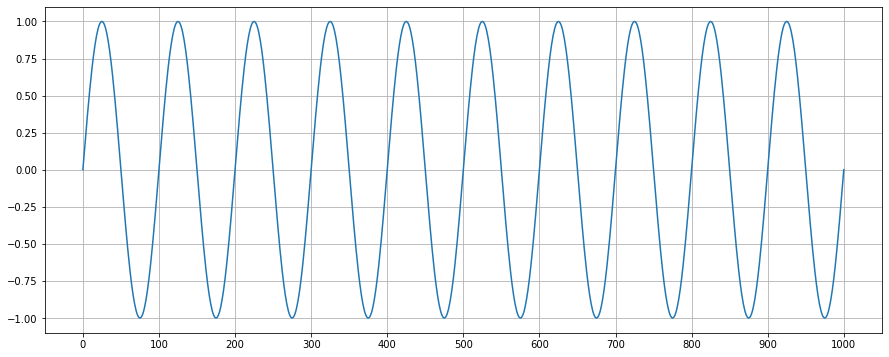

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 1000
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(f(times))
plt.xticks(np.linspace(0, 1000, 11))
plt.grid()

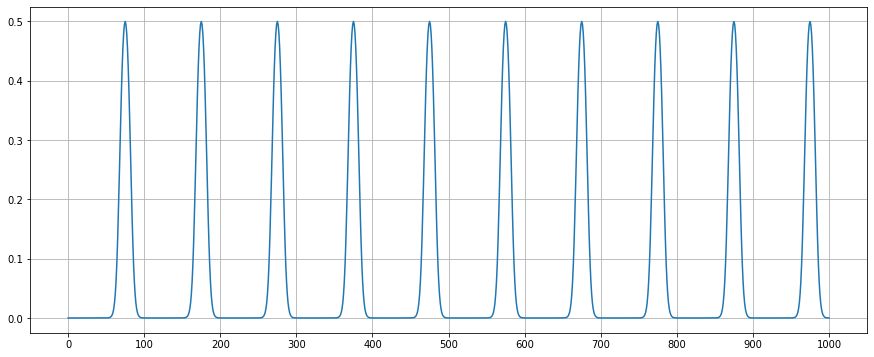

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 1000
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(g(times))
plt.xticks(np.linspace(0, 1000, 11))
plt.grid()

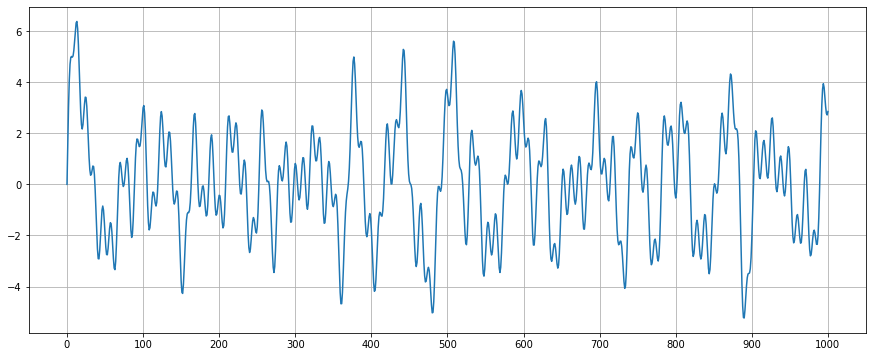

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 1000
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(h(times))
plt.xticks(np.linspace(0, 1000, 11))
plt.grid()

# 関数のフーリエ変換

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero e

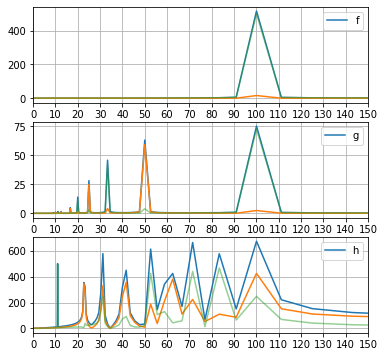

In [0]:
plt.figure(figsize=(6,6))

sp = np.fft.fft(f(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(311)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="f")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(g(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(312)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="g")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(h(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(313)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="h")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

# 時系列データセットの作成

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

func = h

total_time_length = 10000
pred_length = 1000
learning_time_length = 100
time_series_T = np.linspace(0, total_time_length, total_time_length + 1)
time_series_X = func(time_series_T)

X_learn = []
Y_learn = []
for i in range(total_time_length - learning_time_length):
    X_learn.append(time_series_X[i:i+learning_time_length].reshape(1, learning_time_length).T)
    Y_learn.append([time_series_X[i+learning_time_length]])

X_train, X_val, Y_train, Y_val = \
train_test_split(X_learn, Y_learn, test_size=0.2, shuffle=False)

X_train2sklearn = [list(x.reshape(1, len(x))[0]) for x in X_train]
Y_train2sklearn = [y[0] for y in Y_train]

# 多層パーセプトロン(scikit-learn)

In [0]:
%%time
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(100, 100, 100), 
                         early_stopping=True, max_iter=10000) # 回帰器の生成
regressor.fit(X_train2sklearn, Y_train2sklearn) # 学習

CPU times: user 12.6 s, sys: 6.47 s, total: 19.1 s
Wall time: 9.7 s


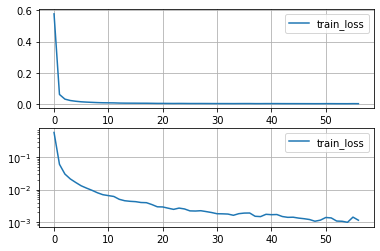

In [0]:
plt.plot(regressor.loss_curve_)
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(regressor.loss_curve_, label='train_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(regressor.loss_curve_, label='train_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
pred_length = 1000
X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = [Y_pred[i:i+learning_time_length]]
    Y_ = regressor.predict(X_)
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 387 ms, sys: 284 ms, total: 671 ms
Wall time: 352 ms


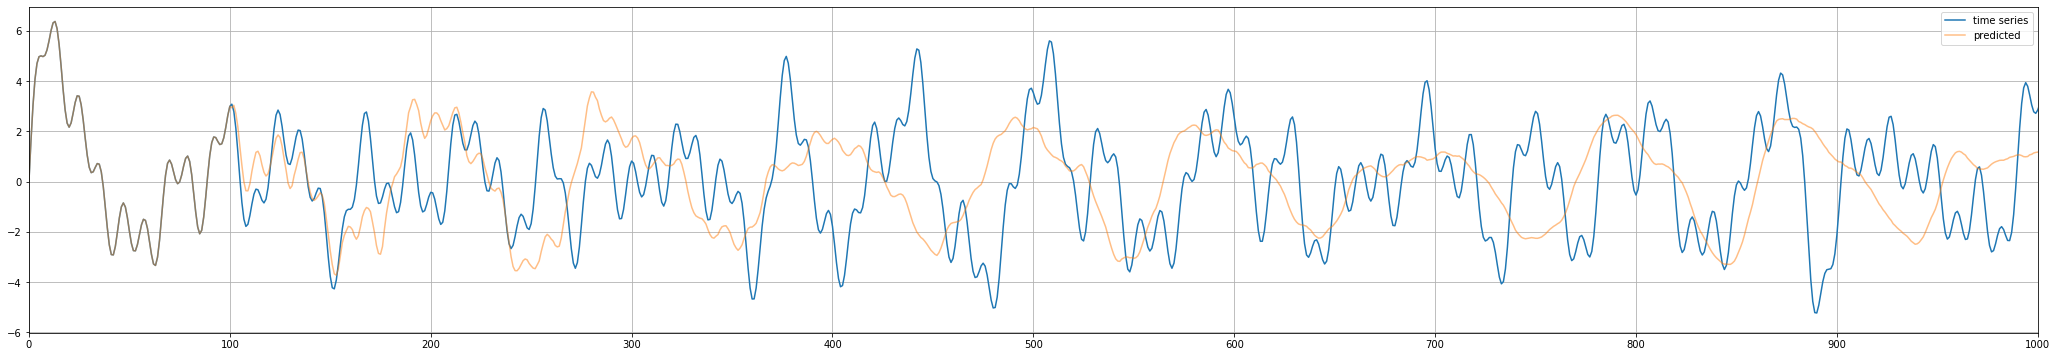

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


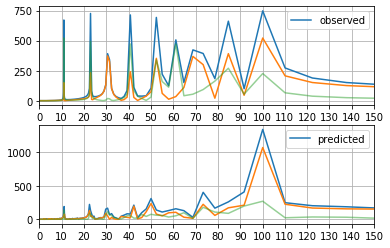

In [0]:
plt.figure(figsize=(6,4))

sp = np.fft.fft(func(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(211)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="observed")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(212)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="predicted")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

# PyTorch で再帰的ニューラルネットワーク

In [0]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## RNN

In [0]:
import torch
class RNN(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.RNN(1, hidden_dim,
                         nonlinearity='tanh',
                         batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## LSTM

In [0]:
import torch
class LSTM(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.LSTM(1, hidden_dim, batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## GRU

In [0]:
import torch
class GRU(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.GRU(1, hidden_dim, batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## EarlyStopping

In [0]:
def EarlyStopping(log, patience=20):
    if len(log) <= patience:
        return False
    min1 = log[:len(log)-patience].min()
    min2 = log[len(log)-patience:].min()
    if min1 <= min2:
        return True
    else:
        return False

## RNN の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = RNN(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 1000
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 1.5635348436159966 Val loss: 0.3007099645005332
Epoch: 2 Train loss: 0.1766701122889152 Val loss: 0.0930010439414117
Epoch: 3 Train loss: 0.07146293588746817 Val loss: 0.04772062133997679
Epoch: 4 Train loss: 0.04161241066713746 Val loss: 0.03069041586584515
Epoch: 5 Train loss: 0.02802028564306406 Val loss: 0.02174532723923524
Epoch: 6 Train loss: 0.02074270359932994 Val loss: 0.017042854930170707
Epoch: 7 Train loss: 0.016239141531957265 Val loss: 0.013703007406244675
Epoch: 8 Train loss: 0.013173557441824904 Val loss: 0.010657094108561674
Epoch: 9 Train loss: 0.010785141016523808 Val loss: 0.00897637801244855
Epoch: 10 Train loss: 0.009107919257635681 Val loss: 0.007865248157435821
Epoch: 11 Train loss: 0.00808271745709368 Val loss: 0.006887843935853905
Epoch: 12 Train loss: 0.006965733545187574 Val loss: 0.005758440561799539
Epoch: 13 Train loss: 0.006272705421090508 Val loss: 0.005174028376738231
Epoch: 14 Train loss: 0.005630508399544618 Val loss: 0.004786737

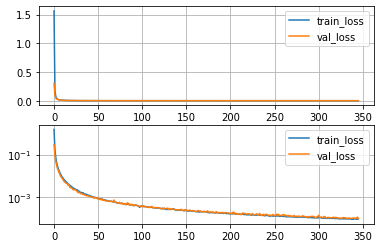

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 2.46 s, sys: 5.03 ms, total: 2.46 s
Wall time: 2.47 s


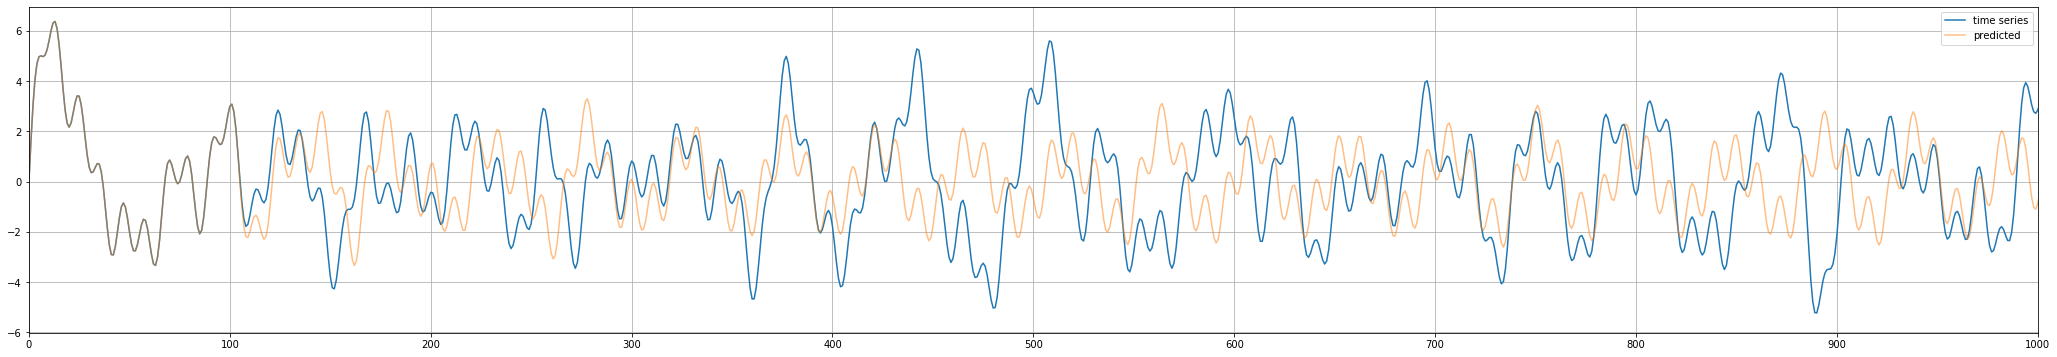

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


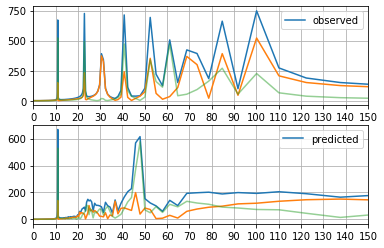

In [0]:
plt.figure(figsize=(6,4))

sp = np.fft.fft(func(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(211)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="observed")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(212)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="predicted")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

## LSTM の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = LSTM(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 1000
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 2.5302898601079598 Val loss: 0.967419770028856
Epoch: 2 Train loss: 0.38726466617141014 Val loss: 0.1313825228975879
Epoch: 3 Train loss: 0.09047211620670098 Val loss: 0.051498543885019094
Epoch: 4 Train loss: 0.03907587030568184 Val loss: 0.02485829273549219
Epoch: 5 Train loss: 0.020570279421428077 Val loss: 0.015714374448483188
Epoch: 6 Train loss: 0.013772466918453574 Val loss: 0.01018803041531808
Epoch: 7 Train loss: 0.009722090171029171 Val loss: 0.007940948707982898
Epoch: 8 Train loss: 0.0074382588500157 Val loss: 0.006565713052016993
Epoch: 9 Train loss: 0.0059419029320661836 Val loss: 0.00622412191134774
Epoch: 10 Train loss: 0.005209162998466919 Val loss: 0.004723149578138772
Epoch: 11 Train loss: 0.004580009089878354 Val loss: 0.004061845473996881
Epoch: 12 Train loss: 0.003909113409463316 Val loss: 0.0039933887698377175
Epoch: 13 Train loss: 0.0034606102436112287 Val loss: 0.003276008983246154
Epoch: 14 Train loss: 0.0028106982339149676 Val loss: 0.003

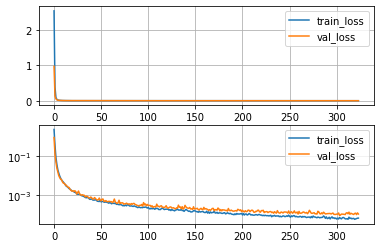

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 7.23 s, sys: 13 ms, total: 7.24 s
Wall time: 7.24 s


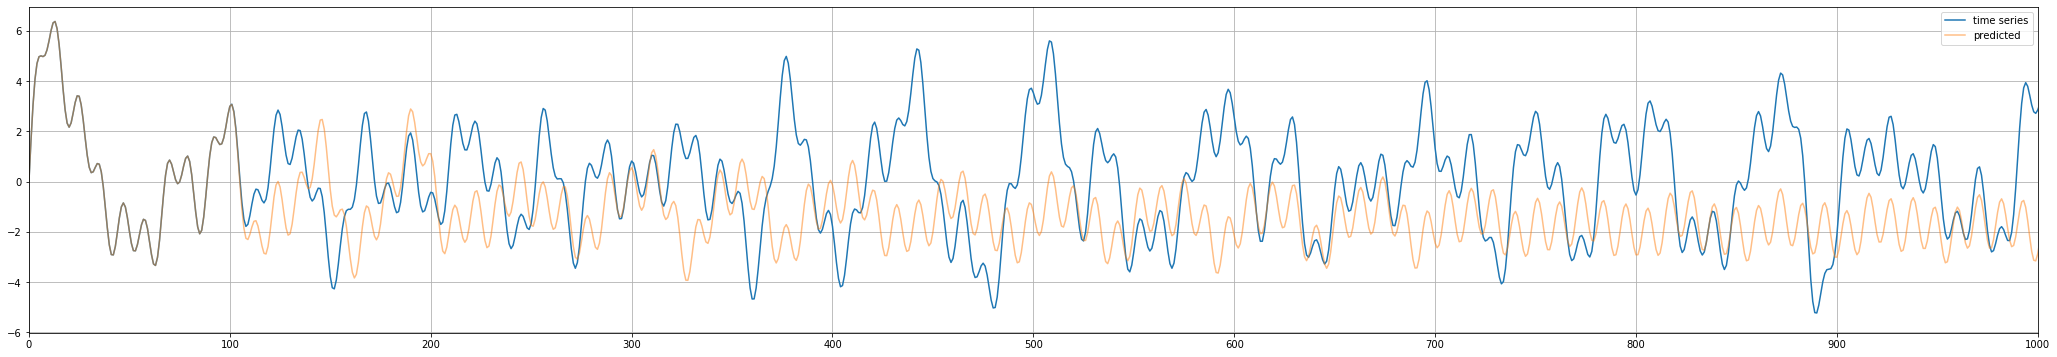

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


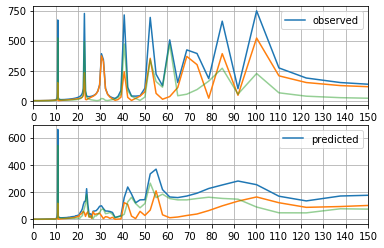

In [0]:
plt.figure(figsize=(6,4))

sp = np.fft.fft(func(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(211)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="observed")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(212)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="predicted")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

## GRU の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = GRU(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 1000
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 1.9041906526455512 Val loss: 0.5822025206353929
Epoch: 2 Train loss: 0.2730406031776697 Val loss: 0.13813418646653494
Epoch: 3 Train loss: 0.10407992452383041 Val loss: 0.07021902542975214
Epoch: 4 Train loss: 0.06268279345180744 Val loss: 0.04782045694688956
Epoch: 5 Train loss: 0.043567827138572164 Val loss: 0.03914236629174815
Epoch: 6 Train loss: 0.0320349120749877 Val loss: 0.026376701943162415
Epoch: 7 Train loss: 0.024034507895031802 Val loss: 0.020078447699132893
Epoch: 8 Train loss: 0.017117532029843483 Val loss: 0.015893345853934687
Epoch: 9 Train loss: 0.013147480726146545 Val loss: 0.010882793848092357
Epoch: 10 Train loss: 0.010905677476563515 Val loss: 0.009699260350316763
Epoch: 11 Train loss: 0.009293281938880682 Val loss: 0.008316081560527286
Epoch: 12 Train loss: 0.008500484104913015 Val loss: 0.008906607153928943
Epoch: 13 Train loss: 0.007958843486192517 Val loss: 0.008421145534763733
Epoch: 14 Train loss: 0.00708936499312329 Val loss: 0.0056531

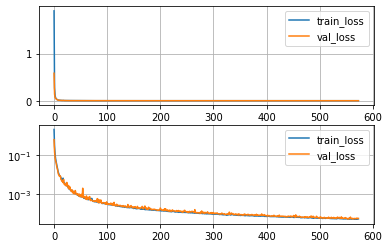

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 8.76 s, sys: 7.99 ms, total: 8.77 s
Wall time: 8.78 s


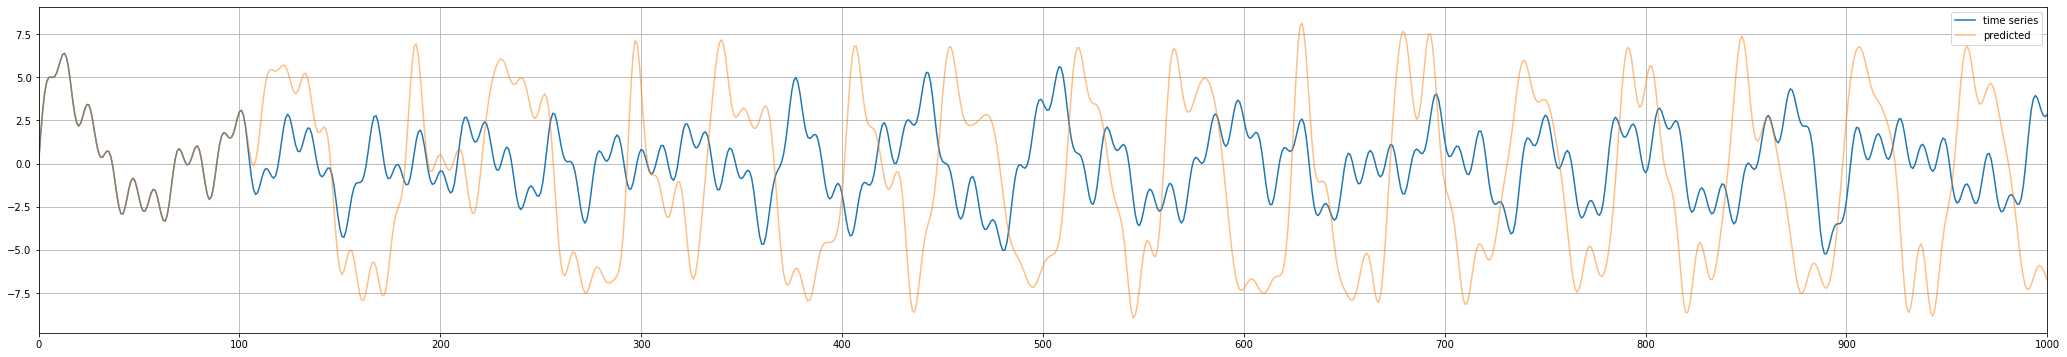

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


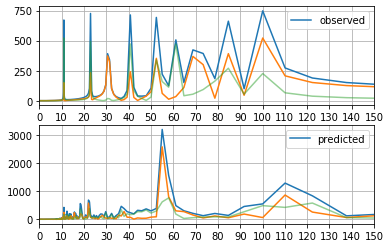

In [0]:
plt.figure(figsize=(6,4))

sp = np.fft.fft(func(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(211)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="observed")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(212)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="predicted")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()